In [13]:
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import subsample_point_cloud, create_digital_elevation_model

In [14]:
las = subsample_point_cloud('../data/cloud_merged.las', factor=10)
#las = subsample_point_cloud('../data/chancados_2_y_3.las', factor=10)

In [15]:
name_file = 'dem2.npz'
x,y,z = las.x, las.y, las.z
dem, mask = create_digital_elevation_model(x,y,z)
np.savez_compressed(name_file, dem=dem, mask=mask)


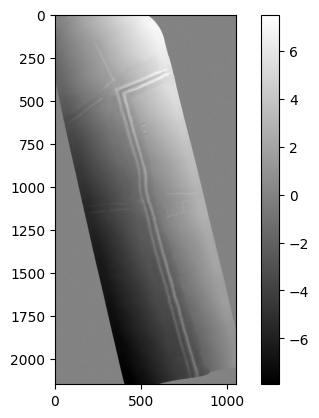

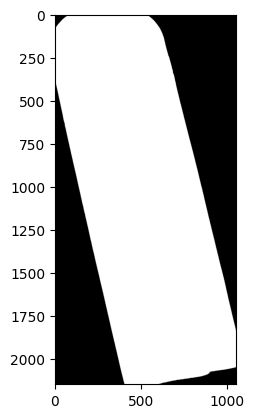

In [16]:

plt.imshow(np.load(name_file)['dem'], cmap='gray') 
plt.colorbar()
plt.show()
plt.imshow(np.load(name_file)['mask'], cmap='gray') 
plt.show()

In [17]:
img = np.load(name_file)['dem']
print(img.shape)
# save img as png with cv2
import cv2
#transform 0-255
img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
img = img.astype(np.uint8)
cv2.imwrite('dem.png', img)



(2148, 1052)


True